In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy
import cartopy.crs as ccrs

import mlpp_features.geo_calculations as geo

## Visualize the sign of distance to alpine ridge

In [27]:
def test_sign_distance_to_alpine_ridge(nb_pts=100):
    """Test distance to alpine ridge with sign"""

    ridge1 = [(46.5, 6.0), (46.5, 11.0)] # horizontal line
    ridge2 = [(46, 6.0), (47, 11.0)] # diagonal line
    ridge3 = [(47.0, 6.0), (45.5, 11.0)] # diagonal line
    ridge4 = [[45.67975, 6.88306],
                [45.75149, 6.80643],
                [45.88912, 7.07724],
                [45.86909, 7.17029],
                [46.25074, 8.03064],
                [46.47280, 8.38946],
                [46.55972, 8.55968],
                [46.56318, 8.80080],
                [46.61256, 8.96059],
                [46.49712, 9.17104],
                [46.50524, 9.33031],
                [46.39905, 9.69325],
                [46.40885, 10.01963],
                [46.63982, 10.29218],
                [46.83630, 10.50783],
                [46.90567, 11.09742],
                ] # the "actual" alpine ridge
    
    # generate nb_pts**2 random points
    rand_lat = np.random.uniform(45.5, 47.5, nb_pts)
    rand_lon = np.random.uniform(6.0, 11.0, nb_pts)
    all_ridges_lat, all_ridges_lon = [], []
    for ridge in [ridge1, ridge2, ridge3, ridge4]:
        all_ridges_lat.extend([r[0] for r in ridge])
        all_ridges_lon.extend([r[1] for r in ridge])

    latitudes, longitudes = np.unique(np.concatenate((rand_lat, all_ridges_lat))), np.unique(np.concatenate((rand_lon, all_ridges_lon)))
    lat_coords, lon_coords = np.meshgrid(latitudes, longitudes)

    rand_points = list(zip(lat_coords.ravel(), lon_coords.ravel()))

    # compute signs for the 4 ridges

    signs1 = np.sign(geo.distances_points_to_line(rand_points, ridge1))
    signs2 = np.sign(geo.distances_points_to_line(rand_points, ridge2))
    signs3 = np.sign(geo.distances_points_to_line(rand_points, ridge3))
    signs4 = np.sign(geo.distances_points_to_line(rand_points, ridge4))

    # create dataframe to easily plot the data

    df1 = pd.DataFrame({"latitude": lat_coords.ravel(), "longitude": lon_coords.ravel(), "sign": signs1})
    df2 = pd.DataFrame({"latitude": lat_coords.ravel(), "longitude": lon_coords.ravel(), "sign": signs2})
    df3 = pd.DataFrame({"latitude": lat_coords.ravel(), "longitude": lon_coords.ravel(), "sign": signs3})
    df4 = pd.DataFrame({"latitude": lat_coords.ravel(), "longitude": lon_coords.ravel(), "sign": signs4})

    extent = [min(lon_coords.ravel()), max(lon_coords.ravel()), min(lat_coords.ravel()), max(lat_coords.ravel())]
    aspect = (extent[1] - extent[0]) / (extent[3] - extent[2])
    fig, axs = plt.subplots(
        2, 2,
        figsize=(8*aspect, 8),
        subplot_kw={"projection": ccrs.PlateCarree()},
        gridspec_kw={"wspace": 0.2, "hspace": 0.2},
    )

    axs[0, 0].set_extent(extent)
    axs[0, 0].add_feature(cartopy.feature.BORDERS.with_scale("10m"))
    sns.scatterplot(
        ax=axs[0, 0], data=df1, x="longitude", y="latitude", hue="sign", s=50/np.sqrt(nb_pts),
    )
    axs[0, 0].legend(loc = "lower right", title="Sign")
    axs[0, 0].plot([ridge1[i][1] for i in range(len(ridge1))], [ridge1[i][0] for i in range(len(ridge1))], color="red")
    axs[0, 0].set_title("Horizontal ridge")

    axs[0, 1].set_extent(extent)
    axs[0, 1].add_feature(cartopy.feature.BORDERS.with_scale("10m"))
    sns.scatterplot(
        ax=axs[0, 1], data=df2, x="longitude", y="latitude", hue="sign", s=50/np.sqrt(nb_pts),
    )
    axs[0, 1].legend(loc = "lower right", title="Sign")
    axs[0, 1].plot([ridge2[i][1] for i in range(len(ridge2))], [ridge2[i][0] for i in range(len(ridge2))], color="red")
    axs[0, 1].set_title("Diagonal ridge")

    axs[1, 0].set_extent(extent)
    axs[1, 0].add_feature(cartopy.feature.BORDERS.with_scale("10m"))
    sns.scatterplot(
        ax=axs[1, 0], data=df3, x="longitude", y="latitude", hue="sign", s=50/np.sqrt(nb_pts),
    )
    axs[1, 0].legend(loc = "lower left", title="Sign")
    axs[1, 0].plot([ridge3[i][1] for i in range(len(ridge3))], [ridge3[i][0] for i in range(len(ridge3))], color="red")
    axs[1, 0].set_title("Diagonal ridge")

    axs[1, 1].set_extent(extent)
    axs[1, 1].add_feature(cartopy.feature.BORDERS.with_scale("10m"))
    sns.scatterplot(
        ax=axs[1, 1], data=df4, x="longitude", y="latitude", hue="sign", s=50/np.sqrt(nb_pts),
    )
    axs[1, 1].legend(loc = "lower right", title="Sign")
    axs[1, 1].plot([ridge4[i][1] for i in range(len(ridge4))], [ridge4[i][0] for i in range(len(ridge4))], color="red")
    axs[1, 1].set_title("Actual alpine ridge")

    for ax in [axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1]]:
        grid_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, dms=True)
        grid_lines.xlines = grid_lines.ylines = False
        grid_lines.top_labels = grid_lines.right_labels = False
        grid_lines.y_inline = grid_lines.x_inline = False
        grid_lines.rotate_labels = False

    fig.suptitle("Sign of distance to alpine ridge for different configuration of the Alpine ridge (red line)")
    fig.tight_layout()
    plt.show()

## Visualize distance to alpine ridge

In [28]:
def test_distance_to_alpine_ridge(nb_pts=100):
    """Test distance to alpine ridge"""

    ridge1 = [(46.5, 6.0), (46.5, 11.0)] # horizontal line
    ridge2 = [(46, 6.0), (47, 11.0)] # diagonal line
    ridge3 = [(47.0, 6.0), (45.5, 11.0)] # diagonal line
    ridge4 = [[45.67975, 6.88306],
                [45.75149, 6.80643],
                [45.88912, 7.07724],
                [45.86909, 7.17029],
                [46.25074, 8.03064],
                [46.47280, 8.38946],
                [46.55972, 8.55968],
                [46.56318, 8.80080],
                [46.61256, 8.96059],
                [46.49712, 9.17104],
                [46.50524, 9.33031],
                [46.39905, 9.69325],
                [46.40885, 10.01963],
                [46.63982, 10.29218],
                [46.83630, 10.50783],
                [46.90567, 11.09742],
                ] # the "actual" alpine ridge
    
    # generate nb_pts**2 random points
    rand_lat = np.random.uniform(45.5, 47.5, nb_pts)
    rand_lon = np.random.uniform(6.0, 11.0, nb_pts)
    all_ridges_lat, all_ridges_lon = [], []
    for ridge in [ridge1, ridge2, ridge3, ridge4]:
        all_ridges_lat.extend([r[0] for r in ridge])
        all_ridges_lon.extend([r[1] for r in ridge])

    latitudes, longitudes = np.unique(np.concatenate((rand_lat, all_ridges_lat))), np.unique(np.concatenate((rand_lon, all_ridges_lon)))
    lat_coords, lon_coords = np.meshgrid(latitudes, longitudes)

    rand_points = list(zip(lat_coords.ravel(), lon_coords.ravel()))

    # compute distances for the 4 ridges

    dist1 = geo.distances_points_to_line(rand_points, ridge1)
    dist2 = geo.distances_points_to_line(rand_points, ridge2)
    dist3 = geo.distances_points_to_line(rand_points, ridge3)
    dist4 = geo.distances_points_to_line(rand_points, ridge4)

    # create dataframe to easily plot the data

    df1 = pd.DataFrame({"latitude": lat_coords.ravel(), "longitude": lon_coords.ravel(), "distance": dist1})
    df2 = pd.DataFrame({"latitude": lat_coords.ravel(), "longitude": lon_coords.ravel(), "distance": dist2})
    df3 = pd.DataFrame({"latitude": lat_coords.ravel(), "longitude": lon_coords.ravel(), "distance": dist3})
    df4 = pd.DataFrame({"latitude": lat_coords.ravel(), "longitude": lon_coords.ravel(), "distance": dist4})

    
    extent = [min(lon_coords.ravel()), max(lon_coords.ravel()), min(lat_coords.ravel()), max(lat_coords.ravel())]
    aspect = (extent[1] - extent[0]) / (extent[3] - extent[2])
    fig, axs = plt.subplots(
        2, 2,
        figsize=(8*aspect, 8),
        subplot_kw={"projection": ccrs.PlateCarree()},
    )
    
    df1_pivot = df1.pivot(index="latitude", columns="longitude", values="distance")
    axs[0, 0].add_feature(cartopy.feature.BORDERS.with_scale("10m"))
    im1 = axs[0, 0].imshow(df1_pivot,
                           cmap="BrBG", origin="lower", vmin=-df1["distance"].abs().max(), vmax=df1["distance"].abs().max(),
                           extent=extent)
    fig.colorbar(im1, ax=axs[0, 0], shrink=0.8)
    axs[0, 0].plot([ridge1[i][1] for i in range(len(ridge1))], [ridge1[i][0] for i in range(len(ridge1))], color="red", label="Alpine ridge")
    samples = df1[np.abs(df1["distance"])<1][['latitude', 'longitude']]
    axs[0, 0].plot(samples['longitude'][::3], samples['latitude'][::3], 'o', color='black', markersize=1, label="|Distance|<1km")
    axs[0, 0].set_title("Horizontal ridge")
    axs[0, 0].set_xlabel("Longitude")
    axs[0, 0].set_ylabel("Latitude")
    axs[0, 0].legend()


    df2_pivot = df2.pivot(index="latitude", columns="longitude", values="distance")
    axs[0, 1].add_feature(cartopy.feature.BORDERS.with_scale("10m"))
    im2 = axs[0, 1].imshow(df2_pivot,
                           cmap="BrBG", origin="lower", vmin=-df2["distance"].abs().max(), vmax=df2["distance"].abs().max(),
                           extent=extent)
    fig.colorbar(im2, ax=axs[0, 1], shrink=0.8)
    axs[0, 1].plot([ridge2[i][1] for i in range(len(ridge2))], [ridge2[i][0] for i in range(len(ridge2))], color="red", label="Alpine ridge")
    samples = df2[np.abs(df2["distance"])<1][['latitude', 'longitude']]
    axs[0, 1].plot(samples['longitude'][::3], samples['latitude'][::3], 'o', color='black', markersize=1, label="|Distance|<1km")
    axs[0, 1].set_title("Diagonal ridge")
    axs[0, 1].set_xlabel("Longitude")
    axs[0, 1].set_ylabel("Latitude")
    axs[0, 1].legend()


    df3_pivot = df3.pivot(index="latitude", columns="longitude", values="distance")
    axs[1, 0].add_feature(cartopy.feature.BORDERS.with_scale("10m"))
    im3 = axs[1, 0].imshow(df3_pivot,
                           cmap="BrBG", origin="lower", vmin=-df3["distance"].abs().max(), vmax=df3["distance"].abs().max(),
                           extent=extent)
    fig.colorbar(im3, ax=axs[1, 0], shrink=0.8)
    axs[1, 0].plot([ridge3[i][1] for i in range(len(ridge3))], [ridge3[i][0] for i in range(len(ridge3))], color="red", label="Alpine ridge")
    samples = df3[np.abs(df3["distance"])<1][['latitude', 'longitude']]
    axs[1, 0].plot(samples['longitude'][::3], samples['latitude'][::3], 'o', color='black', markersize=1, label="|Distance|<1km")
    axs[1, 0].set_title("Diagonal ridge")
    axs[1, 0].set_xlabel("Longitude")
    axs[1, 0].set_ylabel("Latitude")
    axs[1, 0].legend()


    df4_pivot = df4.pivot(index="latitude", columns="longitude", values="distance")
    axs[1, 1].add_feature(cartopy.feature.BORDERS.with_scale("10m"))
    im4 = axs[1, 1].imshow(df4_pivot,
                           cmap="BrBG", origin="lower", vmin=-df4["distance"].abs().max(), vmax=df4["distance"].abs().max(),
                           extent=extent)
    fig.colorbar(im4, ax=axs[1, 1], shrink=0.8)
    axs[1, 1].plot([ridge4[i][1] for i in range(len(ridge4))], [ridge4[i][0] for i in range(len(ridge4))], color="red", label="Alpine ridge")
    samples = df4[np.abs(df4["distance"])<1][['latitude', 'longitude']]
    axs[1, 1].plot(samples['longitude'][::3], samples['latitude'][::3], 'o', color='black', markersize=1, label="|Distance|<1km")
    axs[1, 1].set_title("Actual alpine ridge")
    axs[1, 1].set_xlabel("Longitude")
    axs[1, 1].set_ylabel("Latitude")
    axs[1, 1].legend()
    
    for ax in [axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1]]:
        grid_lines = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, dms=True)
        grid_lines.xlines = grid_lines.ylines = False
        grid_lines.top_labels = grid_lines.right_labels = False
        grid_lines.y_inline = grid_lines.x_inline = False
        grid_lines.rotate_labels = False
        
    fig.suptitle("Distance to alpine ridge for different configuration of the Alpine ridge")
    fig.tight_layout()
    plt.show()

## Make the plots

/tmp/ipykernel_200509/1362694565.py:105: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


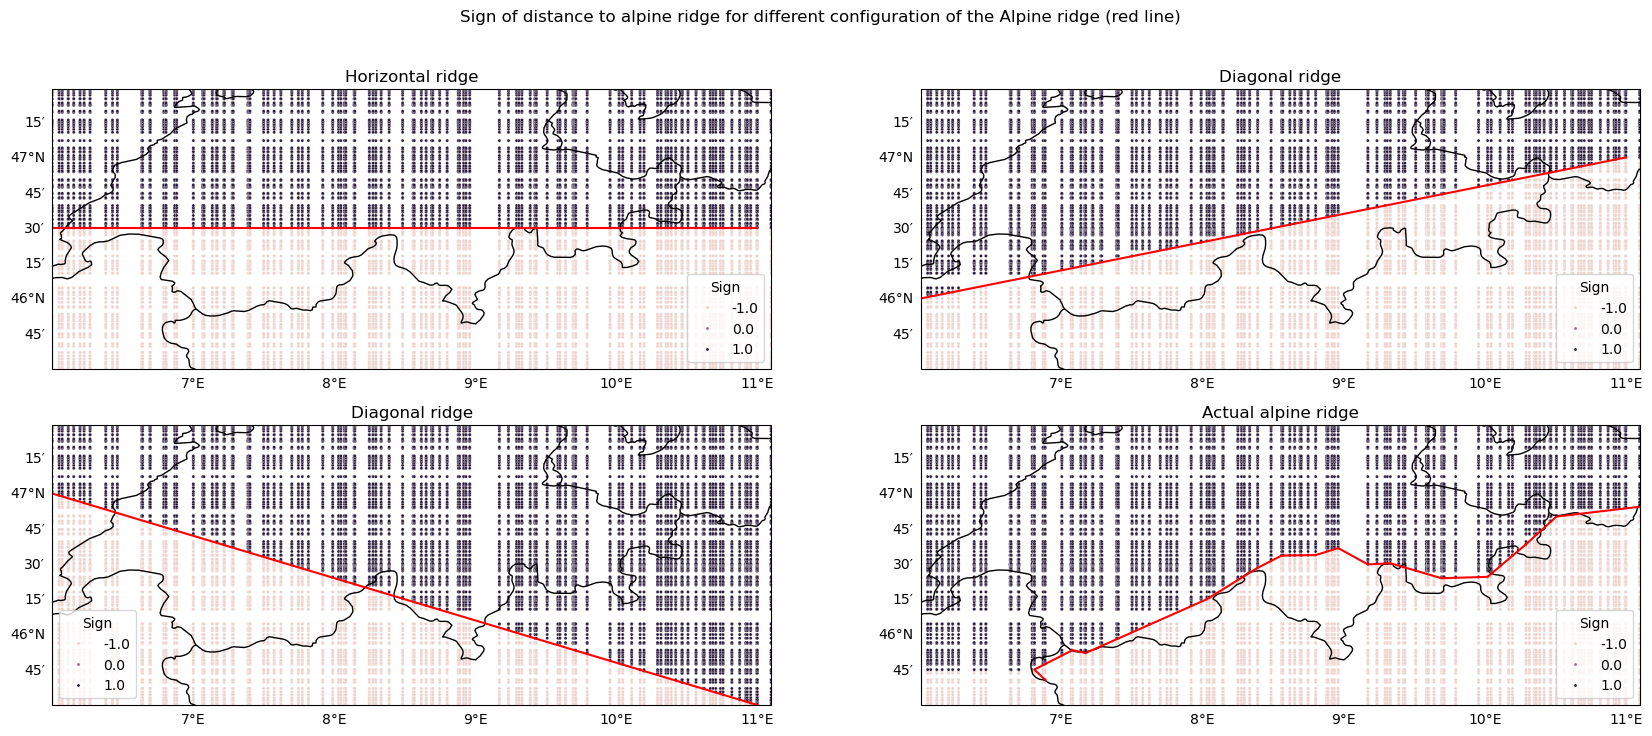

In [29]:
test_sign_distance_to_alpine_ridge(nb_pts=100)

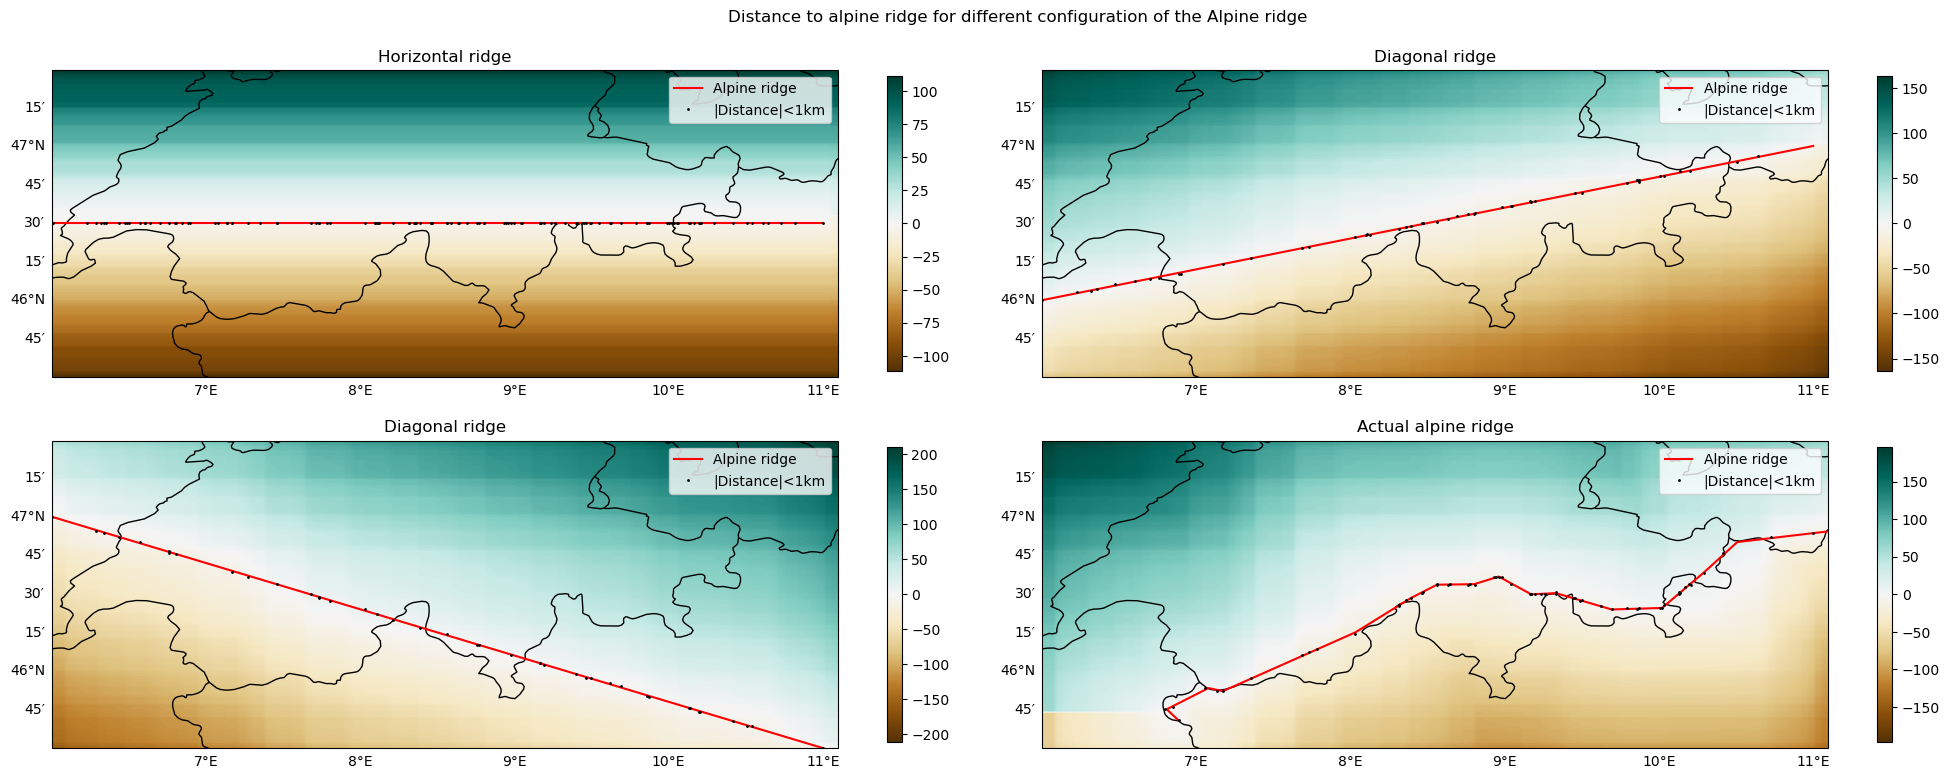

In [30]:
test_distance_to_alpine_ridge(nb_pts=100)